In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# ● you will find the dataset which is related to DDoS Attacks by following this link (https://www.kaggle.com/siddharthm1698/ddos-botnet-attack-on-iot-devices?select=DDoSdata.csv) Download this data 
## ● The data is highly undistributed 
## ● Convert every attribute data type into float data type so attributes require one hot encoding (label encoder) 
## ● You need to apply correlation and variance concepts so that you will take only important columns into consideration 
## ● Use this data for modeling 
## * Create 
### Logistic regression 
### Random Forest 
### Decision Tree 
### Note : Accuracy should be above 90%


In [2]:
# Loading data
data = pd.read_csv("C:\\Users\\ADMIN\\Downloads\\Datasets\\DDoSdata.csv")

In [3]:
# shape of dataset
data.shape

(1927101, 47)

In [4]:
data.head()

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,pkts,bytes,state,state_number,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1650261,1650261,1.528103e+09,e,1,tcp,1,192.168.100.150,54110,192.168.100.3,80,10,1729,RST,1,1.528103e+09,20,6.406424,0.679473,0.544126,1.358946,0.135347,1.223599,6,4,963,766,1.404840,0.780467,0.468280,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.56093,1.21662,328,308,1,DDoS,HTTP
1,1650262,1650262,1.528103e+09,e,1,tcp,1,192.168.100.150,54112,192.168.100.3,80,10,1604,RST,1,1.528103e+09,21,6.405851,0.679572,0.544197,1.359144,0.135375,1.223769,6,4,838,766,1.404966,0.780536,0.468322,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.56107,1.21662,328,308,1,DDoS,HTTP
2,1650263,1650263,1.528103e+09,e,1,tcp,1,192.168.100.150,54114,192.168.100.3,80,8,1708,RST,1,1.528103e+09,22,6.401038,1.110847,1.110847,2.221694,0.000000,2.221694,5,3,1008,700,1.093573,0.624899,0.900214,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24980,1.21662,328,308,1,DDoS,HTTP
3,1650264,1650264,1.528103e+09,e,1,tcp,1,192.168.100.150,54116,192.168.100.3,80,8,1462,RST,1,1.528103e+09,23,6.400703,1.113328,1.113328,2.226655,0.000000,2.226655,5,3,762,700,1.093630,0.624931,0.898208,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24986,1.21662,328,308,1,DDoS,HTTP
4,1650265,1650265,1.528103e+09,e,1,tcp,1,192.168.100.150,54118,192.168.100.3,80,8,1296,RST,1,1.528103e+09,24,6.400472,1.113098,1.113098,2.226195,0.000000,2.226195,5,3,596,700,1.093669,0.624954,0.898394,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24991,1.21662,328,308,1,DDoS,HTTP


In [5]:
#info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927101 entries, 0 to 1927100
Data columns (total 47 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Unnamed: 0                        int64  
 1   pkSeqID                           int64  
 2   stime                             float64
 3   flgs                              object 
 4   flgs_number                       int64  
 5   proto                             object 
 6   proto_number                      int64  
 7   saddr                             object 
 8   sport                             object 
 9   daddr                             object 
 10  dport                             object 
 11  pkts                              int64  
 12  bytes                             int64  
 13  state                             object 
 14  state_number                      int64  
 15  ltime                             float64
 16  seq                               in

In [6]:
data.drop(['Unnamed: 0','pkSeqID'], axis=1, inplace=True)

In [7]:
data.head(3)

,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,pkts,bytes,state,state_number,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1.528103e+09,e,1,tcp,1,192.168.100.150,54110,192.168.100.3,80,10,1729,RST,1,1.528103e+09,20,6.406424,0.679473,0.544126,1.358946,0.135347,1.223599,6,4,963,766,1.404840,0.780467,0.468280,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.56093,1.21662,328,308,1,DDoS,HTTP
1,1.528103e+09,e,1,tcp,1,192.168.100.150,54112,192.168.100.3,80,10,1604,RST,1,1.528103e+09,21,6.405851,0.679572,0.544197,1.359144,0.135375,1.223769,6,4,838,766,1.404966,0.780536,0.468322,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.56107,1.21662,328,308,1,DDoS,HTTP
2,1.528103e+09,e,1,tcp,1,192.168.100.150,54114,192.168.100.3,80,8,1708,RST,1,1.528103e+09,22,6.401038,1.110847,1.110847,2.221694,0.000000,2.221694,5,3,1008,700,1.093573,0.624899,0.900214,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24980,1.21662,328,308,1,DDoS,HTTP


In [8]:
# Checking the duplicate value in data
data.duplicated().sum() 

0

### This means, there is not a single duplicate value present in our dataset.

In [9]:
#Checking null value
data.isnull().sum()

stime                               0
flgs                                0
flgs_number                         0
proto                               0
proto_number                        0
saddr                               0
sport                               0
daddr                               0
dport                               0
pkts                                0
bytes                               0
state                               0
state_number                        0
ltime                               0
seq                                 0
dur                                 0
mean                                0
stddev                              0
sum                                 0
min                                 0
max                                 0
spkts                               0
dpkts                               0
sbytes                              0
dbytes                              0
rate                                0
srate       

## Not any null value present in our dataset.

In [10]:
# Getting all categorical features from the dataset
category = [col for col in data if data[col].dtypes=='object']
category

['flgs',
 'proto',
 'saddr',
 'sport',
 'daddr',
 'dport',
 'state',
 'category',
 'subcategory']

In [11]:
# Making dataframe of categorical features
category_df = data[category]
category_df.head()

,flgs,proto,saddr,sport,daddr,dport,state,category,subcategory
0,e,tcp,192.168.100.150,54110,192.168.100.3,80,RST,DDoS,HTTP
1,e,tcp,192.168.100.150,54112,192.168.100.3,80,RST,DDoS,HTTP
2,e,tcp,192.168.100.150,54114,192.168.100.3,80,RST,DDoS,HTTP
3,e,tcp,192.168.100.150,54116,192.168.100.3,80,RST,DDoS,HTTP
4,e,tcp,192.168.100.150,54118,192.168.100.3,80,RST,DDoS,HTTP


In [12]:
#creating a function which counts the number of values count that categorical features have

def value_count(df, category):
    for col in category:
        print(f"value_counts of {col}:: \n {df[col].value_counts()} \n")      

In [13]:
value_count(data, category)

value_counts of flgs:: 
 e      1129681
e s     778517
e g      17825
e *        809
eU         247
e d         17
e &          5
Name: flgs, dtype: int64 

value_counts of proto:: 
 tcp          978397
udp          948598
arp              82
icmp             16
ipv6-icmp         8
Name: proto, dtype: int64 

value_counts of saddr:: 
 192.168.100.147              520012
192.168.100.148              494696
192.168.100.150              457002
192.168.100.149              451641
192.168.100.3                  3625
192.168.100.4                    19
192.168.100.1                    16
192.168.100.46                   15
192.168.100.27                   14
192.168.100.7                    13
192.168.100.5                    12
192.168.100.6                    11
fe80::250:56ff:febe:254           6
fe80::c0c0:aa20:45b9:bdd9         4
192.168.100.55                    3
fe80::250:56ff:febe:26db          2
fe80::250:56ff:febe:e9d9          2
fe80::250:56ff:febe:89ee          2
fe80::2c6a:ff9b

In [14]:
# creating a function to plot a unique values 
def count_plot(df):
    for col in df:
        if len(df[col].unique()) < 10:
            plt.figure(figsize=(10,5))
            sns.countplot(df[col])
            plt.xlabel(col)
            plt.xticks(rotation=45)
            
     

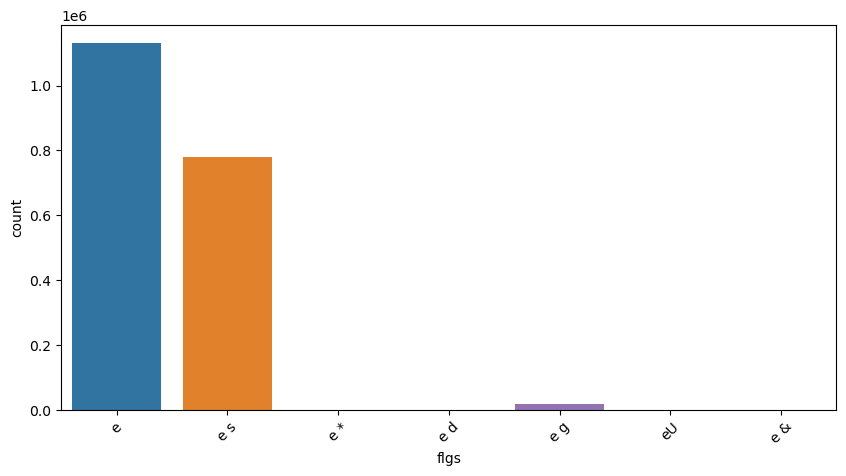

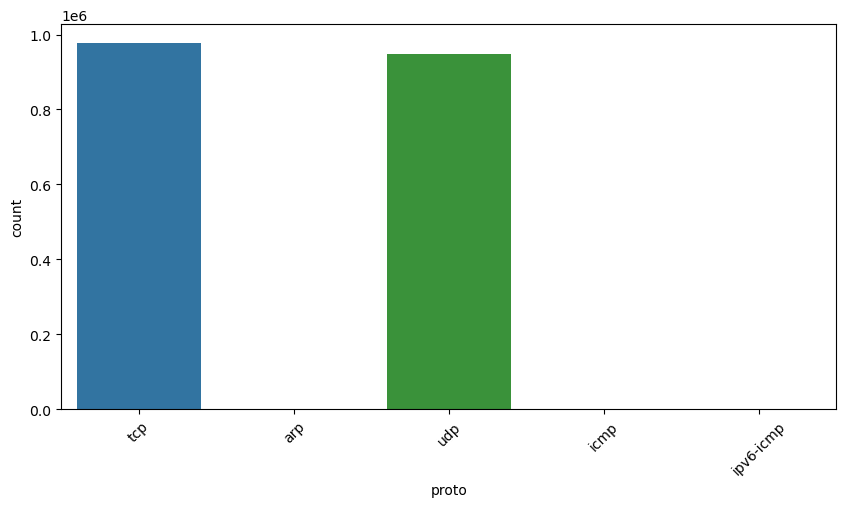

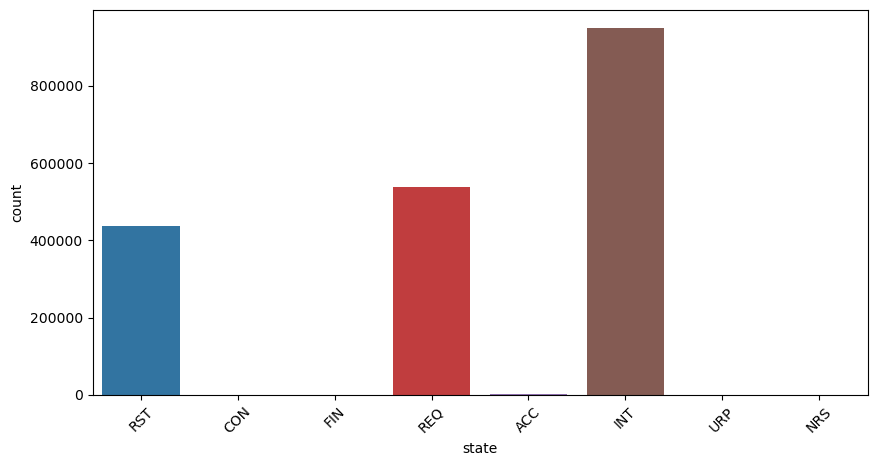

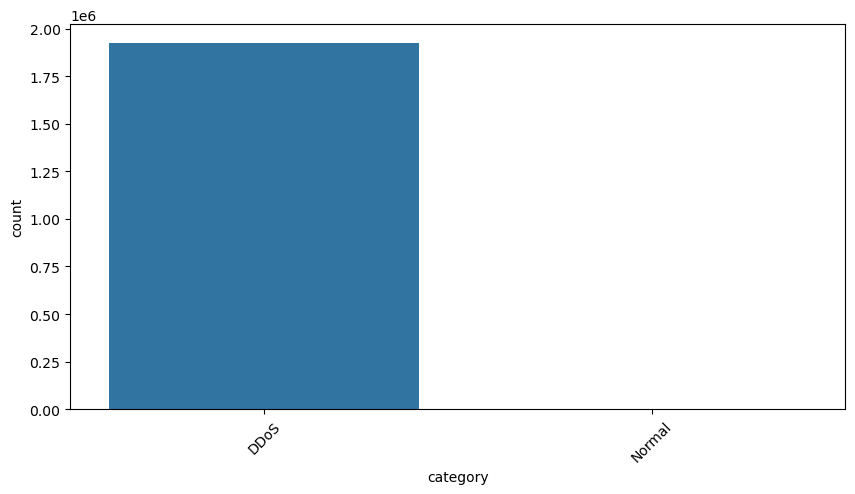

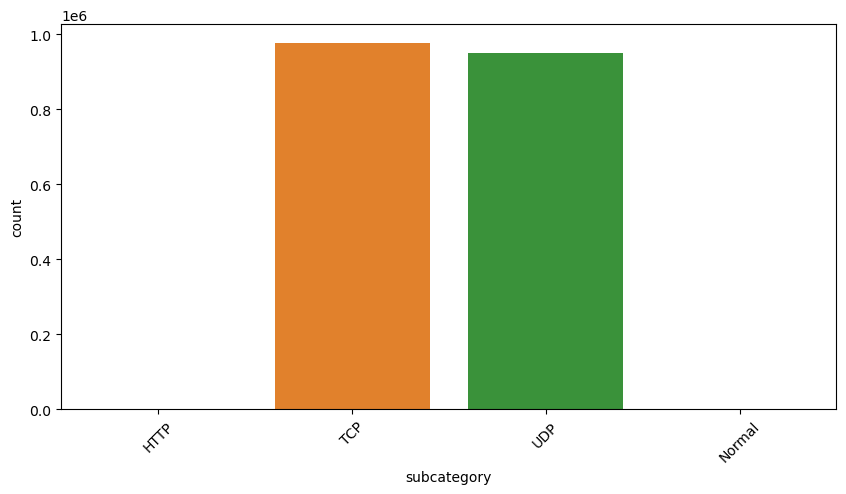

In [15]:
count_plot(category_df)


In [16]:
# Let's see how many unique value has each categorical feature

for col in category_df.columns:
    print(f"{col} :: {len(category_df[col].unique())} unique values \n")

flgs :: 7 unique values 

proto :: 5 unique values 

saddr :: 21 unique values 

sport :: 128077 unique values 

daddr :: 83 unique values 

dport :: 3429 unique values 

state :: 8 unique values 

category :: 2 unique values 

subcategory :: 4 unique values 



## By observing above number of unique values of all categorical feature, we came to know that we have some features which has greater number of unique values(i.e saddr, daddr) . so applying one hot encoding on these columns may leads curse of dimensionality. 
## we have to delete the columns which has large number of unique values

In [17]:
# removing 'saddr', 'daddr', 'sport', 'dport' columns
categorical_df = category_df.drop(columns=['saddr', 'daddr', 'sport', 'dport'])
categorical_df.head(3)


,flgs,proto,state,category,subcategory
0,e,tcp,RST,DDoS,HTTP
1,e,tcp,RST,DDoS,HTTP
2,e,tcp,RST,DDoS,HTTP


In [18]:
# Let's find top most frequent categories of feature and make a list

unique_flgs = [x for x in data['flgs'].value_counts().sort_values(ascending=False).index]
unique_proto = [x for x in data['proto'].value_counts().sort_values(ascending=False).index]
unique_state = [x for x in data['state'].value_counts().sort_values(ascending=False).index]
unique_category = [x for x in data['category'].value_counts().sort_values(ascending=False).index]
unique_subcategory = [x for x in data['subcategory'].value_counts().sort_values(ascending=False).index]

print("unique_flgs=>", unique_flgs, '\n')
print("unique_proto=>", unique_proto, '\n')
print("unique_state=>", unique_state, '\n')
print("unique_category=>", unique_category, '\n')
print("unique_subcategory=>", unique_subcategory, '\n')


unique_flgs=> ['e', 'e s', 'e g', 'e *', 'eU', 'e d', 'e &'] 

unique_proto=> ['tcp', 'udp', 'arp', 'icmp', 'ipv6-icmp'] 

unique_state=> ['INT', 'REQ', 'RST', 'ACC', 'CON', 'FIN', 'URP', 'NRS'] 

unique_category=> ['DDoS', 'Normal'] 

unique_subcategory=> ['TCP', 'UDP', 'HTTP', 'Normal'] 



In [19]:
# creating a function for applying one hot encoding on whole list of top frequent of all categorical fearure

def one_hot_encoding(data, var, category):
    for label in category:
        data[var+'_'+label] = np.where(data[var]==label, 1, 0)
        
        

In [20]:
# Performing one hot encoding on each categorical column

one_hot_encoding(categorical_df,'flgs', unique_flgs)
one_hot_encoding(categorical_df,'proto', unique_proto)
one_hot_encoding(categorical_df,'state', unique_state)
one_hot_encoding(categorical_df,'category', unique_category)
one_hot_encoding(categorical_df,'subcategory', unique_subcategory)

categorical_df.head()

,flgs,proto,state,category,subcategory,flgs_e,flgs_e s,flgs_e g,flgs_e *,flgs_eU,flgs_e d,flgs_e &,proto_tcp,proto_udp,proto_arp,proto_icmp,proto_ipv6-icmp,state_INT,state_REQ,state_RST,state_ACC,state_CON,state_FIN,state_URP,state_NRS,category_DDoS,category_Normal,subcategory_TCP,subcategory_UDP,subcategory_HTTP,subcategory_Normal
0,e,tcp,RST,DDoS,HTTP,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,e,tcp,RST,DDoS,HTTP,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,e,tcp,RST,DDoS,HTTP,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3,e,tcp,RST,DDoS,HTTP,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,e,tcp,RST,DDoS,HTTP,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [21]:
# Dropping old columns from categorical df

final_category = categorical_df.drop(columns = ['flgs', 'proto', 'state', 'category', 'subcategory'])

In [22]:
final_category.head()

,flgs_e,flgs_e s,flgs_e g,flgs_e *,flgs_eU,flgs_e d,flgs_e &,proto_tcp,proto_udp,proto_arp,proto_icmp,proto_ipv6-icmp,state_INT,state_REQ,state_RST,state_ACC,state_CON,state_FIN,state_URP,state_NRS,category_DDoS,category_Normal,subcategory_TCP,subcategory_UDP,subcategory_HTTP,subcategory_Normal
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [23]:
# Getting numerical features from the data
numeric =  [col for col in data.columns if data[col].dtypes != 'object']
final_numeric = data[numeric]
final_numeric.head()

,stime,flgs_number,proto_number,pkts,bytes,state_number,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
0,1.528103e+09,1,1,10,1729,1,1.528103e+09,20,6.406424,0.679473,0.544126,1.358946,0.135347,1.223599,6,4,963,766,1.404840,0.780467,0.468280,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.56093,1.21662,328,308,1
1,1.528103e+09,1,1,10,1604,1,1.528103e+09,21,6.405851,0.679572,0.544197,1.359144,0.135375,1.223769,6,4,838,766,1.404966,0.780536,0.468322,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.56107,1.21662,328,308,1
2,1.528103e+09,1,1,8,1708,1,1.528103e+09,22,6.401038,1.110847,1.110847,2.221694,0.000000,2.221694,5,3,1008,700,1.093573,0.624899,0.900214,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24980,1.21662,328,308,1
3,1.528103e+09,1,1,8,1462,1,1.528103e+09,23,6.400703,1.113328,1.113328,2.226655,0.000000,2.226655,5,3,762,700,1.093630,0.624931,0.898208,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24986,1.21662,328,308,1
4,1.528103e+09,1,1,8,1296,1,1.528103e+09,24,6.400472,1.113098,1.113098,2.226195,0.000000,2.226195,5,3,596,700,1.093669,0.624954,0.898394,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24991,1.21662,328,308,1


In [24]:
# Concatenating numerical and categorical df and making final df

final_df = pd.concat([final_numeric, final_category], axis=1)
final_df.head()

,stime,flgs_number,proto_number,pkts,bytes,state_number,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,flgs_e,flgs_e s,flgs_e g,flgs_e *,flgs_eU,flgs_e d,flgs_e &,proto_tcp,proto_udp,proto_arp,proto_icmp,proto_ipv6-icmp,state_INT,state_REQ,state_RST,state_ACC,state_CON,state_FIN,state_URP,state_NRS,category_DDoS,category_Normal,subcategory_TCP,subcategory_UDP,subcategory_HTTP,subcategory_Normal
0,1.528103e+09,1,1,10,1729,1,1.528103e+09,20,6.406424,0.679473,0.544126,1.358946,0.135347,1.223599,6,4,963,766,1.404840,0.780467,0.468280,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.56093,1.21662,328,308,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,1.528103e+09,1,1,10,1604,1,1.528103e+09,21,6.405851,0.679572,0.544197,1.359144,0.135375,1.223769,6,4,838,766,1.404966,0.780536,0.468322,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.56107,1.21662,328,308,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,1.528103e+09,1,1,8,1708,1,1.528103e+09,22,6.401038,1.110847,1.110847,2.221694,0.000000,2.221694,5,3,1008,700,1.093573,0.624899,0.900214,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24980,1.21662,328,308,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3,1.528103e+09,1,1,8,1462,1,1.528103e+09,23,6.400703,1.113328,1.113328,2.226655,0.000000,2.226655,5,3,762,700,1.093630,0.624931,0.898208,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24986,1.21662,328,308,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,1.528103e+09,1,1,8,1296,1,1.528103e+09,24,6.400472,1.113098,1.113098,2.226195,0.000000,2.226195,5,3,596,700,1.093669,0.624954,0.898394,56864,59969,308,328,328,700,1.26889,1.21662,40,38,1.24991,1.21662,328,308,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [25]:
# shape of final data
final_df.shape

(1927101, 62)

In [26]:
print(f"Before changing dtype of data::\n {final_df.dtypes}\n")

Before changing dtype of data::
 stime                 float64
flgs_number             int64
proto_number            int64
pkts                    int64
bytes                   int64
                       ...   
category_Normal         int32
subcategory_TCP         int32
subcategory_UDP         int32
subcategory_HTTP        int32
subcategory_Normal      int32
Length: 62, dtype: object



In [27]:
final_df = final_df.astype('float')
print(f"After changing dtype of data::\n {final_df.dtypes}\n")

After changing dtype of data::
 stime                 float64
flgs_number           float64
proto_number          float64
pkts                  float64
bytes                 float64
                       ...   
category_Normal       float64
subcategory_TCP       float64
subcategory_UDP       float64
subcategory_HTTP      float64
subcategory_Normal    float64
Length: 62, dtype: object



## Seperating independent and dependent feature

In [28]:
iv = final_df.drop('attack', axis=1)
dv = final_df['attack']

# Correlation

In [29]:
# Plotting correlation using heatmap
corr_matrix = iv.corr()
corr_matrix

,stime,flgs_number,proto_number,pkts,bytes,state_number,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,flgs_e,flgs_e s,flgs_e g,flgs_e *,flgs_eU,flgs_e d,flgs_e &,proto_tcp,proto_udp,proto_arp,proto_icmp,proto_ipv6-icmp,state_INT,state_REQ,state_RST,state_ACC,state_CON,state_FIN,state_URP,state_NRS,category_DDoS,category_Normal,subcategory_TCP,subcategory_UDP,subcategory_HTTP,subcategory_Normal
stime,1.000000,-0.037305,0.053141,-0.231689,-0.209283,0.053552,1.000000,0.023411,-0.265006,0.064384,0.036942,-0.209550,0.034287,0.066493,-0.252960,-0.146397,-0.228197,-0.143209,-0.140700,-0.101604,-0.082287,-0.286360,-0.257299,-0.234647,-0.202945,-0.787966,-0.185895,-0.113722,-0.110760,0.548889,0.045475,-0.018777,-0.003013,-0.094223,-0.079510,0.041051,-0.039786,-0.004767,-0.000961,0.000925,-0.022020,-0.102202,-0.052120,0.055740,-0.237204,2.356381e-04,-0.129251,0.070149,-0.030237,-0.026132,-0.001722,-0.747923,-0.159895,2.356381e-04,-0.129251,0.997868,-0.997868,-0.049242,0.080424,0.004806,-0.997868
flgs_number,-0.037305,1.000000,-0.721827,-0.001919,0.008048,-0.591638,-0.037219,-0.100535,0.202020,-0.327331,-0.076976,-0.192643,-0.214087,-0.274159,-0.011641,0.013582,0.005671,0.010023,-0.003807,-0.001393,0.003991,0.006931,0.012099,-0.180788,-0.199367,-0.080938,-0.172789,-0.008265,-0.004748,-0.024668,-0.059868,-0.005599,-0.012326,-0.376309,-0.336664,-0.875090,0.761327,0.570522,0.086987,0.085646,0.007677,0.014859,0.721852,-0.721772,-0.004796,-2.118498e-03,-0.001498,-0.721610,0.414244,0.415422,0.027589,-0.007629,-0.000923,-2.118498e-03,-0.001498,0.009707,-0.009707,0.722393,-0.721514,-0.013009,-0.009707
proto_number,0.053141,-0.721827,1.000000,0.015475,-0.000435,0.790461,0.053096,-0.010303,-0.114764,0.638364,0.276766,0.354244,0.367797,0.610713,0.026066,-0.004435,-0.000481,-0.000288,0.000410,0.001777,-0.002068,0.000596,-0.003995,0.307322,0.344788,0.136620,0.300769,-0.004447,-0.002717,0.025592,0.087377,-0.000360,-0.009844,0.604996,0.543533,0.826771,-0.810673,-0.095142,-0.020179,0.011498,-0.002925,-0.001586,-0.999966,0.999908,0.000101,5.807999e-03,0.006145,0.999681,-0.613267,-0.533466,-0.035318,0.007670,-0.002837,5.807999e-03,0.006145,-0.011856,0.011856,-0.998892,0.999552,-0.022290,0.011856
pkts,-0.231689,-0.001919,0.015475,1.000000,0.983805,0.007050,-0.231499,-0.013049,0.482558,0.021304,-0.000354,0.730143,0.015532,0.017507,0.944385,0.860365,0.944772,0.859303,0.000723,0.000030,0.017157,0.658251,0.793426,0.582683,0.698572,0.298121,0.766881,0.000686,0.000169,-0.132760,-0.009706,0.001356,0.000835,0.526960,0.475939,0.011641,-0.013481,-0.000916,0.000072,0.000133,0.000060,0.599826,-0.015474,0.015475,-0.000168,1.599309e-04,-0.000088,0.013551,-0.016443,-0.005489,-0.000428,0.223261,0.000385,1.599309e-04,-0.000088,-0.233085,0.233085,-0.019403,0.012056,0.000286,0.233085
bytes,-0.209283,0.008048,-0.000435,0.983805,1.000000,-0.002407,-0.209114,-0.006026,0.432014,0.006120,-0.003541,0.650118,0.004583,0.003773,0.901271,0.889549,0.949345,0.889421,0.000773,0.000056,0.017737,0.660369,0.755147,0.566228,0.641656,0.265628,0.729571,0.000895,0.000316,-0.119635,-0.010394,0.001356,0.001168,0.489090,0.450907,0.000203,-0.002195,-0.000333,-0.000022,-0.000039,0.000028,0.626630,0.000436,-0.000435,-0.000038,8.629142e-07,-0.000014,-0.002415,-0.002268,-0.001381,-0.000080,0.214767,0.000156,8.629142e-07,-0.000014,-0.209606,0.209606,-0.003204,-0.003395,0.000084,0.209606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
category_Normal,-0.997868,-0.009707,0.011856,0.233085,0.209606,-0.002317,-0.997871,-0.024394,0.2582

In [30]:
# Getting highly correlated features
threshold = 0.8
correlated = set()

for row in range(len(corr_matrix)):
    for col in range(row):
        if abs(corr_matrix.iloc[row][col]) > threshold:
            correlated.add(corr_matrix.columns[row])
            
print(f"Highly correlated features are : {(correlated)}")


Highly correlated features are : {'state_NRS', 'state_URP', 'dbytes', 'TnP_Per_Dport', 'ltime', 'subcategory_TCP', 'AR_P_Proto_P_Dport', 'sbytes', 'category_Normal', 'proto_udp', 'flgs_e s', 'spkts', 'Pkts_P_State_P_Protocol_P_DestIP', 'state_RST', 'TnP_PSrcIP', 'category_DDoS', 'bytes', 'TnBPDstIP', 'proto_tcp', 'Pkts_P_State_P_Protocol_P_SrcIP', 'TnP_PDstIP', 'state_INT', 'subcategory_UDP', 'subcategory_Normal', 'max', 'dpkts', 'flgs_e', 'AR_P_Proto_P_DstIP'}


In [31]:
# Dropping all highly correlated features from the independent 
Iv = iv.drop(correlated, axis=1)

In [32]:
Iv.head()

,stime,flgs_number,proto_number,pkts,state_number,seq,dur,mean,stddev,sum,min,rate,srate,drate,TnBPSrcIP,TnP_PerProto,AR_P_Proto_P_SrcIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,flgs_e g,flgs_e *,flgs_eU,flgs_e d,flgs_e &,proto_arp,proto_icmp,proto_ipv6-icmp,state_REQ,state_ACC,state_CON,state_FIN,subcategory_HTTP
0,1.528103e+09,1.0,1.0,10.0,1.0,20.0,6.406424,0.679473,0.544126,1.358946,0.135347,1.404840,0.780467,0.468280,56864.0,328.0,1.26889,40.0,38.0,1.56093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.528103e+09,1.0,1.0,10.0,1.0,21.0,6.405851,0.679572,0.544197,1.359144,0.135375,1.404966,0.780536,0.468322,56864.0,328.0,1.26889,40.0,38.0,1.56107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.528103e+09,1.0,1.0,8.0,1.0,22.0,6.401038,1.110847,1.110847,2.221694,0.000000,1.093573,0.624899,0.900214,56864.0,328.0,1.26889,40.0,38.0,1.24980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.528103e+09,1.0,1.0,8.0,1.0,23.0,6.400703,1.113328,1.113328,2.226655,0.000000,1.093630,0.624931,0.898208,56864.0,328.0,1.26889,40.0,38.0,1.24986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.528103e+09,1.0,1.0,8.0,1.0,24.0,6.400472,1.113098,1.113098,2.226195,0.000000,1.093669,0.624954,0.898394,56864.0,328.0,1.26889,40.0,38.0,1.24991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
print(f"Sahpe of  independent data after correlation :: {Iv.shape}")

Sahpe of  independent data after correlation :: (1927101, 33)


# Variance

In [34]:
from sklearn.feature_selection import VarianceThreshold

# Getting features which has less variance(i.e var < 0.1  )
var = VarianceThreshold(threshold=0.1)  
out = var.fit(Iv)
less_var_col = Iv.columns[out.get_support() == False]
len(less_var_col)

12

In [35]:
# dropping less variant columns from independent feature
X = Iv.drop(less_var_col, axis=1)

In [36]:
X.head()

,stime,flgs_number,proto_number,pkts,state_number,seq,dur,mean,stddev,sum,min,rate,srate,drate,TnBPSrcIP,TnP_PerProto,AR_P_Proto_P_SrcIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,state_REQ
0,1.528103e+09,1.0,1.0,10.0,1.0,20.0,6.406424,0.679473,0.544126,1.358946,0.135347,1.404840,0.780467,0.468280,56864.0,328.0,1.26889,40.0,38.0,1.56093,0.0
1,1.528103e+09,1.0,1.0,10.0,1.0,21.0,6.405851,0.679572,0.544197,1.359144,0.135375,1.404966,0.780536,0.468322,56864.0,328.0,1.26889,40.0,38.0,1.56107,0.0
2,1.528103e+09,1.0,1.0,8.0,1.0,22.0,6.401038,1.110847,1.110847,2.221694,0.000000,1.093573,0.624899,0.900214,56864.0,328.0,1.26889,40.0,38.0,1.24980,0.0
3,1.528103e+09,1.0,1.0,8.0,1.0,23.0,6.400703,1.113328,1.113328,2.226655,0.000000,1.093630,0.624931,0.898208,56864.0,328.0,1.26889,40.0,38.0,1.24986,0.0
4,1.528103e+09,1.0,1.0,8.0,1.0,24.0,6.400472,1.113098,1.113098,2.226195,0.000000,1.093669,0.624954,0.898394,56864.0,328.0,1.26889,40.0,38.0,1.24991,0.0


In [37]:
print(f" After correlation & Variance the shape of independent data is :: {X.shape}")

 After correlation & Variance the shape of independent data is :: (1927101, 21)


## Let's understand distribution of target class

In [38]:
print(dv.value_counts())

1.0    1926624
0.0        477
Name: attack, dtype: int64


### we have majority of positive class i.e class 1 and minority of negative class i.e. class 0. The data is highly undistributed. so by training model with this undistributed data will get biased towards majority class. Our model will not perform very well. so, we will train the model using sampling techniques.

## Scaling data using standard scaler

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
IV = scaler.fit_transform(X)
DV = dv.values

# Let's see the performance of different model with imbalanced data

## 1. Logistic Regression with imbalanced data

In [40]:
# importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
# Split train-test data
X_train, X_test, y_train, y_test = train_test_split(IV, DV, test_size=0.3, random_state=42)

In [42]:
# fitting Logistic regression model using hyperparameter

lg_class = LogisticRegression()
lg_class.fit(X_train, y_train)

LogisticRegression()

In [43]:
# Logistic model prediction
y_hat = lg_class.predict(X_test)

In [44]:
# Checking Logistic model performance
print(f"confusion_matrix of logistic model :: \n {confusion_matrix(y_test,y_hat)}\n")
print(f"accuracy_score of logistic model :: \n {accuracy_score(y_test,y_hat)}\n")
print(f"classification_report of logistic model :: \n{classification_report(y_test,y_hat)}\n")

confusion_matrix of logistic model :: 
 [[   141      0]
 [     1 577989]]

accuracy_score of logistic model :: 
 0.9999982702882219

classification_report of logistic model :: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       141
         1.0       1.00      1.00      1.00    577990

    accuracy                           1.00    578131
   macro avg       1.00      1.00      1.00    578131
weighted avg       1.00      1.00      1.00    578131




## Random Forest classifier with imbalance data

In [45]:
# Fitting Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=25, max_depth=3)
rf.fit(X_train, y_train)
y_hat1 = rf.predict(X_test)

In [46]:
# Checking RandomForest model performance
print(f"confusion_matrix of RandomForest model :: \n {confusion_matrix(y_test,y_hat1)}\n")
print(f"accuracy_score of RandomForest model :: \n {accuracy_score(y_test,y_hat1)}\n")
print(f"classification_report of RandomForest model :: \n{classification_report(y_test,y_hat1)}\n")

confusion_matrix of RandomForest model :: 
 [[   141      0]
 [     0 577990]]

accuracy_score of RandomForest model :: 
 1.0

classification_report of RandomForest model :: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       141
         1.0       1.00      1.00      1.00    577990

    accuracy                           1.00    578131
   macro avg       1.00      1.00      1.00    578131
weighted avg       1.00      1.00      1.00    578131




## Decision Tree model with imbalance data

In [47]:
# Fitting DeciosionTree classifier
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier(max_depth=3)
dc.fit(X_train, y_train)
y_hat2 = dc.predict(X_test)

In [48]:
# Checking DecisionTree model performance
print(f"confusion_matrix of DecisionTree model :: \n {confusion_matrix(y_test,y_hat2)}\n")
print(f"accuracy_score of DecisionTree model :: \n {accuracy_score(y_test,y_hat2)}\n")
print(f"classification_report of DecisionTree model :: \n{classification_report(y_test,y_hat2)}\n")

confusion_matrix of DecisionTree model :: 
 [[   141      0]
 [     0 577990]]

accuracy_score of DecisionTree model :: 
 1.0

classification_report of DecisionTree model :: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       141
         1.0       1.00      1.00      1.00    577990

    accuracy                           1.00    578131
   macro avg       1.00      1.00      1.00    578131
weighted avg       1.00      1.00      1.00    578131




# Undersampling

In [49]:
# import random undersampling and other necessary libraries
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


In [50]:

# Summarize target distribution
print("Before undersampling: ", Counter(y_train))

# define undersampling
undersample = RandomUnderSampler(sampling_strategy= 'majority')

#Fit & apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# Summarize target distribution
print("After undersampling: ", Counter(y_train_under))


Before undersampling:  Counter({1.0: 1348634, 0.0: 336})
After undersampling:  Counter({0.0: 336, 1.0: 336})


## Logistic Regression using undersampling

In [51]:
from sklearn.linear_model import LogisticRegression


In [52]:
# Fitting logistic model with undersample
log_reg = LogisticRegression()
log_under = log_reg.fit(X_train_under, y_train_under)
pred_log_under = log_under.predict(X_test)

In [53]:
# checking performance
print(f"confusion_matrix of under_sampled logistic model :: \n {confusion_matrix(y_test,pred_log_under)}\n")
print(f"accuracy_score of under_sampled logistic model :: \n {accuracy_score(y_test,pred_log_under)}\n")
print(f"classification_report of under_sampled logistic model :: \n{classification_report(y_test,pred_log_under)}\n")

confusion_matrix of under_sampled logistic model :: 
 [[   141      0]
 [     1 577989]]

accuracy_score of under_sampled logistic model :: 
 0.9999982702882219

classification_report of under_sampled logistic model :: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       141
         1.0       1.00      1.00      1.00    577990

    accuracy                           1.00    578131
   macro avg       1.00      1.00      1.00    578131
weighted avg       1.00      1.00      1.00    578131




## Random forest using undersampling

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=25, max_depth=3)
rf_under = rf_clf.fit(X_train_under, y_train_under)
rf_pred_under = rf_under.predict(X_test)

In [55]:
# checking performance
print(f"confusion_matrix of under_sampled Random Forest model :: \n {confusion_matrix(y_test,rf_pred_under)}\n")
print(f"accuracy_score of under_sampled Random Forest model :: \n {accuracy_score(y_test,rf_pred_under)}\n")
print(f"classification_report of under_sampled Random Forest model :: \n{classification_report(y_test,rf_pred_under)}\n")

confusion_matrix of under_sampled Random Forest model :: 
 [[   141      0]
 [     0 577990]]

accuracy_score of under_sampled Random Forest model :: 
 1.0

classification_report of under_sampled Random Forest model :: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       141
         1.0       1.00      1.00      1.00    577990

    accuracy                           1.00    578131
   macro avg       1.00      1.00      1.00    578131
weighted avg       1.00      1.00      1.00    578131




## Decision Tree with undersampling

In [56]:
from sklearn.tree import DecisionTreeClassifier
dc_clf = DecisionTreeClassifier(max_depth=5)
dc_under = dc_clf.fit(X_train_under, y_train_under)
pred_dc_under = dc_under.predict(X_test)

In [57]:
# checking performance
print(f"confusion_matrix of under_sampled Decision Tree model :: \n {confusion_matrix(y_test,pred_dc_under)}\n")
print(f"accuracy_score of under_sampled Decision Tree model :: \n {accuracy_score(y_test,pred_dc_under)}\n")
print(f"classification_report of under_sampled Decision Tree model :: \n{classification_report(y_test,pred_dc_under)}\n")

confusion_matrix of under_sampled Decision Tree model :: 
 [[   141      0]
 [     0 577990]]

accuracy_score of under_sampled Decision Tree model :: 
 1.0

classification_report of under_sampled Decision Tree model :: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       141
         1.0       1.00      1.00      1.00    577990

    accuracy                           1.00    578131
   macro avg       1.00      1.00      1.00    578131
weighted avg       1.00      1.00      1.00    578131




# Oversampling with SMOTE

## In oversampling with SMOTE , the minority class is over-sampled by creating synthetic data.

In [58]:
# import SMOTE oversampling 
from imblearn.over_sampling import SMOTE

In [59]:
# summerize class distribution before over sampling
print(f"Before Over_sampling : {Counter(y_train)}")

# define oversampling strategy
smote = SMOTE()

#fit and apply the transform
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# summerize class distribution after over sampling
print(f"After Over_sampling : {Counter(y_train_smote)}")

Before Over_sampling : Counter({1.0: 1348634, 0.0: 336})
After Over_sampling : Counter({1.0: 1348634, 0.0: 1348634})


## Logistic Regression using SMOTE

In [60]:
Log = LogisticRegression()
Log_over = Log.fit(X_train_smote, y_train_smote)
pred_Log_over = Log_over.predict(X_test)

In [61]:
# checking performance
print(f"confusion_matrix of over_sampled logistic model :: \n {confusion_matrix(y_test,pred_Log_over)}\n")
print(f"accuracy_score of over_sampled logistic model :: \n {accuracy_score(y_test,pred_Log_over)}\n")
print(f"classification_report of over_sampled logistic model :: \n{classification_report(y_test,pred_Log_over)}\n")

confusion_matrix of over_sampled logistic model :: 
 [[   141      0]
 [     1 577989]]

accuracy_score of over_sampled logistic model :: 
 0.9999982702882219

classification_report of over_sampled logistic model :: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       141
         1.0       1.00      1.00      1.00    577990

    accuracy                           1.00    578131
   macro avg       1.00      1.00      1.00    578131
weighted avg       1.00      1.00      1.00    578131




## Random Forest with SMOTE

In [62]:
RF = RandomForestClassifier(n_estimators=25, max_depth=3)
RF_over = RF.fit(X_train_smote, y_train_smote)
RF_pred_over = RF_over.predict(X_test)

In [63]:
# checking performance
print(f"confusion_matrix of over_sampled Random Forest model :: \n {confusion_matrix(y_test,RF_pred_over)}\n")
print(f"accuracy_score of over_sampled Random Forest model :: \n {accuracy_score(y_test,RF_pred_over)}\n")
print(f"classification_report of over_sampled Random Forest model :: \n{classification_report(y_test,RF_pred_over)}\n")

confusion_matrix of over_sampled Random Forest model :: 
 [[   141      0]
 [     0 577990]]

accuracy_score of over_sampled Random Forest model :: 
 1.0

classification_report of over_sampled Random Forest model :: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       141
         1.0       1.00      1.00      1.00    577990

    accuracy                           1.00    578131
   macro avg       1.00      1.00      1.00    578131
weighted avg       1.00      1.00      1.00    578131




## Decision Tree with SMOTE

In [64]:
DC = DecisionTreeClassifier(max_depth=5)
DC_over = DC.fit(X_train_smote, y_train_smote)
pred_DC_over = DC_over.predict(X_test)

In [65]:
# checking performance
print(f"confusion_matrix of over_sampled DecisionTree model :: \n {confusion_matrix(y_test,pred_DC_over)}\n")
print(f"accuracy_score of over_sampled DecisionTree model :: \n {accuracy_score(y_test,pred_DC_over)}\n")
print(f"classification_report of over_sampled DecisionTree model :: \n{classification_report(y_test,pred_DC_over)}\n")

confusion_matrix of over_sampled DecisionTree model :: 
 [[   141      0]
 [     0 577990]]

accuracy_score of over_sampled DecisionTree model :: 
 1.0

classification_report of over_sampled DecisionTree model :: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       141
         1.0       1.00      1.00      1.00    577990

    accuracy                           1.00    578131
   macro avg       1.00      1.00      1.00    578131
weighted avg       1.00      1.00      1.00    578131


